In [1]:
%matplotlib widget
# %matplotlib notebook
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

import universal as up
from universal import tools, algos
from universal.algos import *

sns.set_context("notebook")
# plt.rcParams["figure.figsize"] = (16, 8)

In [2]:
# load data using tools module
# data = tools.dataset('nyse_o')

data_file = './XNSE_20210813.csv'
df = pd.read_csv(data_file, header=None) # takes some time to read into memory
print(df)

                   0           1          2          3          4          5  \
0          20MICRONS  2008-10-08  12.381691  12.912335  11.099302  11.718386   
1          20MICRONS  2008-10-09  11.718386  11.718386  11.718386  11.718386   
2          20MICRONS  2008-10-10  11.010861  11.010861   9.573700  10.259115   
3          20MICRONS  2008-10-13  10.745539  11.762606  10.303336  10.900310   
4          20MICRONS  2008-10-14  11.342513  11.497285   9.507370   9.794802   
...              ...         ...        ...        ...        ...        ...   
12813915  ZYLOG_UADJ  2019-07-23   0.400000   0.400000   0.400000   0.400000   
12813916  ZYLOG_UADJ  2019-07-24   0.400000   0.400000   0.400000   0.400000   
12813917  ZYLOG_UADJ  2019-07-25   0.400000   0.400000   0.400000   0.400000   
12813918  ZYLOG_UADJ  2019-07-26   0.400000   0.400000   0.400000   0.400000   
12813919  ZYLOG_UADJ  2019-07-29   0.350000   0.350000   0.350000   0.350000   

                  6   7   8  
0        

In [39]:
def build_prices(basedata, scrips, start_date):
    """make a dataframe with rows as trading dates, cols as scrips and cells as (absolute) prices;
    basedata: dataframe from Quandl CSV, scrips: list of scrip strings, start_date: string in YYYY-mm-dd"""
    
    mkt = pd.DataFrame()
    count = 0
    for scrip in scrips:         
        if count == 0: 
            # populate date col using 1st scrip's date data
            mkt['date'] = df.loc[df[0]==scrip][1].values
            # mkt.set_index('date', inplace=True)   

        prices = basedata.loc[basedata[0]==scrip][2].values
        # print(f'DEBUG: scrip: {scrip}, prices[:3]={prices[:3]}')
        mkt[scrip] = prices

        count += 1
    
    # truncate by start date
    print(f'DEBUG: before truncation, mkt.iloc[0]={mkt.iloc[0]}')
    mkt = mkt[mkt['date'] >= start_date]
    print(f'DEBUG: after truncation, mkt.iloc[0]={mkt.iloc[0]}')
    
    return mkt.drop(columns=['date']).reset_index(drop=True)
    

In [40]:
data = build_prices(basedata=df, scrips=['RELIANCE','TCS','HINDUNILVR'], start_date='2007-01-03')
print(data)

DEBUG: before truncation, mkt.iloc[0]=date          2007-01-02
RELIANCE      281.588588
TCS            236.84148
HINDUNILVR    159.314012
Name: 0, dtype: object
DEBUG: after truncation, mkt.iloc[0]=date          2007-01-03
RELIANCE      283.797126
TCS           241.387974
HINDUNILVR    158.728837
Name: 1, dtype: object
         RELIANCE          TCS   HINDUNILVR
0      283.797126   241.387974   158.728837
1      284.901395   247.552711   155.802960
2      281.588588   243.699750   154.632609
3      285.784810   242.543862   156.058974
4      285.961493   240.405469   153.681699
...           ...          ...          ...
3809  2081.000000  3323.900000  2379.450000
3810  2082.000000  3315.600000  2394.000000
3811  2096.950000  3350.000000  2390.000000
3812  2124.900000  3326.000000  2395.000000
3813  2117.300000  3360.750000  2401.000000

[3814 rows x 3 columns]


In [5]:
# OLMAR algo from git repo
algo = algos.OLMAR(window=5, eps=10)

# run
result = algo.run(data)

/home/aditya/github/universal-portfolios/universal/algo.py:244: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, s in X.iteritems():
/home/aditya/github/universal-portfolios/universal/tools.py:500: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not ix.is_monotonic:


/home/aditya/github/universal-portfolios/universal/tools.py:500: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not ix.is_monotonic:
/home/aditya/github/universal-portfolios/universal/tools.py:500: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not ix.is_monotonic:
/home/aditya/github/universal-portfolios/universal/tools.py:500: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not ix.is_monotonic:
/home/aditya/github/universal-portfolios/universal/algo.py:244: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, s in X.iteritems():
/home/aditya/github/universal-portfolios/universal/algo.py:244: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for n

Summary:
    Profit factor: 1.22
    Sharpe ratio: 1.27 ± 0.35
    Ulcer index: 4.10
    Information ratio (wrt benchmark): 0.85
    Benchmark sharpe: 0.95 ± 0.31
    Appraisal ratio (wrt benchmark): 0.84 ± 0.26
    Beta / Alpha: 1.01 / 18.183%
    Annualized return: 39.37%
    Annualized volatility: 31.02%
    Longest drawdown: 230 days
    Max drawdown: 47.16%
    Winning days: 52.4%
    Annual turnover: 197.3
        


/home/aditya/github/universal-portfolios/universal/algo.py:244: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, s in X.iteritems():
/home/aditya/github/universal-portfolios/universal/algo.py:244: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, s in X.iteritems():
/home/aditya/github/universal-portfolios/universal/tools.py:500: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not ix.is_monotonic:


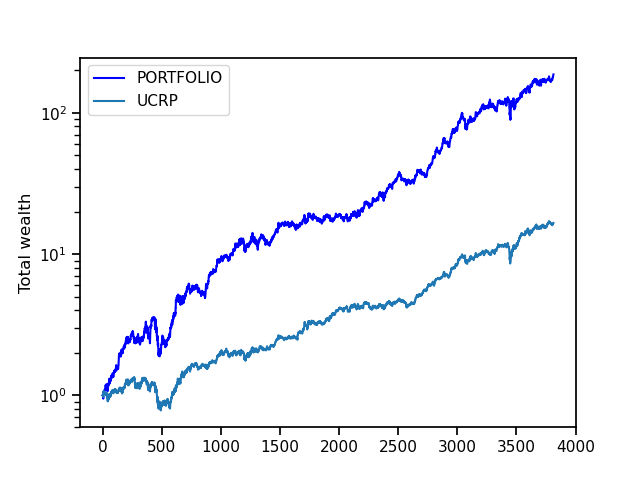

In [6]:
print(result.summary())
result.plot(weights=False, assets=False, ucrp=True, logy=True);

/home/aditya/github/universal-portfolios/universal/algo.py:244: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, s in X.iteritems():
/home/aditya/github/universal-portfolios/universal/tools.py:500: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not ix.is_monotonic:
/home/aditya/github/universal-portfolios/universal/tools.py:500: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not ix.is_monotonic:
/home/aditya/github/universal-portfolios/universal/tools.py:500: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not ix.is_monotonic:
/home/aditya/github/universal-portfolios/universal/tools.py:500: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increa

Summary:
    Profit factor: 1.16
    Sharpe ratio: 0.95 ± 0.31
    Ulcer index: 2.72
    Information ratio (wrt benchmark): 0.10
    Benchmark sharpe: 0.95 ± 0.31
    Appraisal ratio (wrt benchmark): 0.25 ± 0.26
    Beta / Alpha: 0.92 / 2.702%
    Annualized return: 22.13%
    Annualized volatility: 23.18%
    Longest drawdown: 638 days
    Max drawdown: 31.61%
    Winning days: 51.4%
    Annual turnover: 2.1
        


/home/aditya/github/universal-portfolios/universal/algo.py:244: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, s in X.iteritems():
/home/aditya/github/universal-portfolios/universal/algo.py:244: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, s in X.iteritems():
/home/aditya/github/universal-portfolios/universal/tools.py:500: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not ix.is_monotonic:


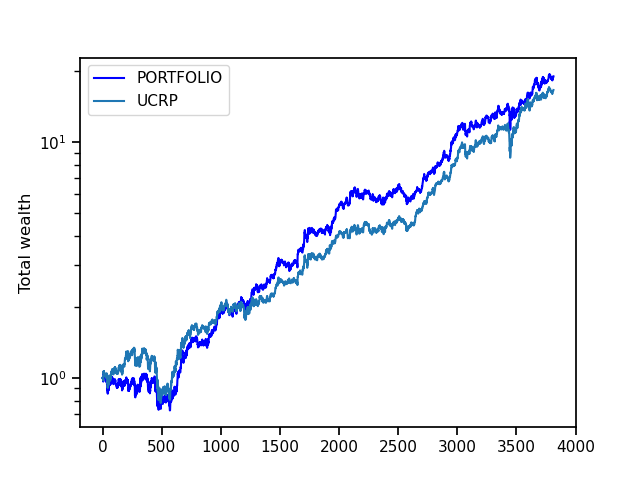

In [53]:
# best CRP algo from git repo
algo = algos.BCRP()

# run
result = algo.run(data)

print(result.summary())
result.plot(weights=False, assets=False, ucrp=True, logy=True);


In [54]:
result.B

,RELIANCE,TCS,HINDUNILVR
0,0.0,0.461571,0.538429
1,0.0,0.461571,0.538429
2,0.0,0.461571,0.538429
3,0.0,0.461571,0.538429
4,0.0,0.461571,0.538429
...,...,...,...
3809,0.0,0.461571,0.538429
3810,0.0,0.461571,0.538429
3811,0.0,0.461571,0.538429
3812,0.0,0.461571,0.538429


/home/aditya/github/universal-portfolios/universal/algo.py:244: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, s in X.iteritems():
/home/aditya/github/universal-portfolios/universal/tools.py:500: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not ix.is_monotonic:
/home/aditya/github/universal-portfolios/universal/tools.py:500: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not ix.is_monotonic:
/home/aditya/github/universal-portfolios/universal/tools.py:500: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not ix.is_monotonic:
/home/aditya/github/universal-portfolios/universal/tools.py:500: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increa

Summary:
    Profit factor: 1.16
    Sharpe ratio: 0.95 ± 0.31
    Ulcer index: 2.44
    Information ratio (wrt benchmark): 0.00
    Benchmark sharpe: 0.95 ± 0.31
    Appraisal ratio (wrt benchmark): -0.00 ± 0.26
    Beta / Alpha: 1.00 / -0.000%
    Annualized return: 21.02%
    Annualized volatility: 22.14%
    Longest drawdown: 398 days
    Max drawdown: 41.67%
    Winning days: 52.0%
    Annual turnover: 2.5
        


/home/aditya/github/universal-portfolios/universal/algo.py:244: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, s in X.iteritems():
/home/aditya/github/universal-portfolios/universal/algo.py:244: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, s in X.iteritems():
/home/aditya/github/universal-portfolios/universal/tools.py:500: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not ix.is_monotonic:


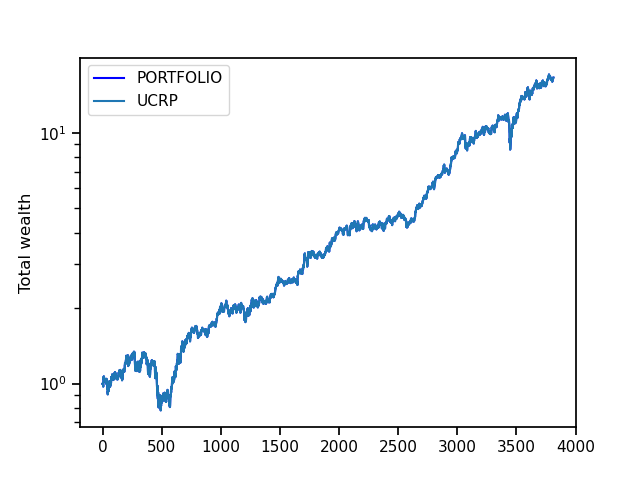

In [57]:
# dynamic CRP algo from git repo
algo = algos.DynamicCRP(n=np.Inf)

# run
result = algo.run(data)

print(result.summary())
result.plot(weights=False, assets=False, ucrp=True, logy=True);


In [52]:
result.B

,RELIANCE,TCS,HINDUNILVR
0,3.333333e-01,3.333333e-01,3.333333e-01
1,3.333333e-01,3.333333e-01,3.333333e-01
2,0.000000e+00,1.000000e+00,0.000000e+00
3,5.912942e-17,3.252621e-17,6.245005e-17
4,1.000000e+00,5.837793e-16,0.000000e+00
...,...,...,...
3809,1.000000e+00,4.996004e-16,0.000000e+00
3810,4.767593e-17,1.000000e+00,1.110223e-16
3811,0.000000e+00,0.000000e+00,1.000000e+00
3812,1.110223e-16,1.000000e+00,0.000000e+00
